# Home assigment 1

Please give your name below:

In [ ]:
name='Robin Vestling'

## Exercise 2

When you enter a nuclear physics lab, you often find a nice [nuclide chart](https://en.wikipedia.org/wiki/Table_of_nuclides) on the wall. Now we will try to make our own, where we color the nuclides according to the average binding energy of the nuclides.

Along this home assignment you find a file called 'HA1-relmass.txt' (downloaded from https://www.nist.gov/pml/atomic-weights-and-isotopic-compositions-relative-atomic-masses
). This contains a list of several nuclides in the following format:

```
    Atomic Number = 1
    Atomic Symbol = H
    Mass Number = 1
    Relative Atomic Mass = 1.00782503223(9)
    Isotopic Composition = 0.999885(70)
    Standard Atomic Weight = [1.00784,1.00811]
    Notes = m
```

Your task is going to be to 

- extract the information from the file 'HA1-relmass.txt' with python. Your interest will be the atomic number, symbol, mass number and relative atomic mass. Arrange the data into a dictionary of dictionaries, where the keys of the main dictionary are formatted as `symbolA` (eg. `H1`,`U235`), and the keys of the subdictionaries are `Z`, `A`, `m`). Thus the dictionary will look like:

```
    isotopes={'H1': {'Z': 1,'A': 1,'m': 1.00782503223},
              'D2': {'Z': 1,'A': 2,'m': 2.01410177812}
               ...}
```

- During the datalab you have written a function to calculate the average binding energy per nucleon. Use this function to calculate the binding energy of each nuclide, and include this information as another entry with key `'eps'` in the subdictionaries.

```
    isotopes={...,
              'D2': {'Z': 1,'A': 2,'m': 2.01410177812, 'eps': 1.1122897908460128},
               ...}
```

- Find out which nuclide has the highest binding energy per nucleon.
- Create a 2D numpy array called `NZ` which has 119 rows (the highest atomic number) and 178 columns (the highest neutron number). Fill it up with the binding energy per nucleon value.
- Plot the content of `NZ` with `plt.imshow()`. (hint: for N-Z pairs for which no known nuclide exists you probably allocated 0.0 as the binding energy. The default colormap of matplotlib will color these values as blue. If you want these values to be colored white you can convert all 0.0 values to `np.nan`.)

Highest binding energy per nucleon: Ni62 8.56 MeV.


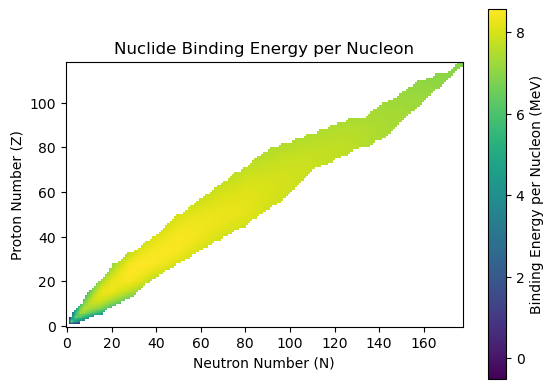

In [2]:
# write your solution here
import re
import numpy as np
import matplotlib.pyplot as plt

# Constants for the binding energy calculation
mp = 1.007276466812  # mass of proton in u
mn = 1.00866491582   # mass of neutron in u
muc2 = 931.49410242  # atomic mass unit(MeV)

def BAZ(A, Z, m):
    """Function to calculate the binding energy per nucleon."""
    eps = (Z * mp + (A - Z) * mn - m) * muc2
    return eps / A

# Initialize the dictionary to store isotopes data
isotopes = {}

# Read the file and extract data
with open('HA1-relmass.txt', 'r') as file:
    content = file.read()

# Split the content into blocks corresponding to each nuclide
nuclides = content.split('\n\n')

# Parse each block to extract data
for nuclide in nuclides:
    lines = nuclide.splitlines()
    
    # Extract relevant data
    Z = int(re.search(r'Atomic Number = (\d+)', lines[0]).group(1))
    symbol = re.search(r'Atomic Symbol = (\w+)', lines[1]).group(1)
    A = int(re.search(r'Mass Number = (\d+)', lines[2]).group(1))
    m = float(re.search(r'Relative Atomic Mass = ([\d\.]+)', lines[3]).group(1))
    
    #Fill dictionary with isotope data
    key = f"{symbol}{A}"
    isotopes[key] = {'Z': Z, 'A': A, 'm': m}

# Calculate and store the binding energy for each nuclide
for key in isotopes:
    Z = isotopes[key]['Z']
    A = isotopes[key]['A']
    m = isotopes[key]['m']
    isotopes[key]['eps'] = BAZ(A, Z, m)

# Find the nuclide with the highest binding energy per nucleon
max_binding_energy = -float('inf')
most_stable_nuclide = None

for key, data in isotopes.items():
    if data['eps'] > max_binding_energy:
        max_binding_energy = data['eps']
        most_stable_nuclide = key

print(f"Highest binding energy per nucleon: {most_stable_nuclide} {max_binding_energy:.2f} MeV.")

# Create empty array
NZ = np.full((119, 178), np.nan)

# Fill the array with binding energies
for data in isotopes.values():
    Z = data['Z']
    N = data['A'] - Z
    NZ[Z, N] = data['eps']

# Plot the result
plt.imshow(NZ, cmap='viridis', origin='lower')
plt.colorbar(label='Binding Energy per Nucleon (MeV)')
plt.xlabel('N')
plt.ylabel('Z')
plt.title('Binding Energy per Nucleon')
plt.show()